# Understanding Basics of Co-variance Metrics

__Note:__ The eigenvectors of the covariance matrix have some really useful properties.

Each eigenvector shows a __direction__ in the data where the values vary the most. This means it points in the direction where the data is most spread out. The __eigenvalue__ that comes with it tells us __how much__ the data varies in that direction.

In PCA, we use these eigenvectors to __rotate__ the data into a new set of axes that better capture the important patterns. This helps us simplify the data while keeping the most useful information.

This notebook illustrates that point.

## Example 1: Linear points

Create 2D dataset.  Get is co-variancre metric
 - $X = -10\dots+10$
 - $Y = 2 * X$

$$
\Sigma =
\begin{bmatrix}
\text{Var}(X) & \text{Cov}(X, y) \\\\
\text{Cov}(y, X) & \text{Var}(y)
\end{bmatrix}

\begin{bmatrix}
38.5 & 77 \\\\
77 & 154
\end{bmatrix}
$$

Where: 
 - $\text{Var}(X) = \frac{1}{n-1} \sum (X_i - \bar{X})^2 = 38.5$ 
 - $\text{Cov}(X, y) = 2 \cdot \text{Var}(X) = 2 \cdot 38.5 = 77$
 - $\text{Var}(y) = 4 \cdot \text{Var}(X) = 4 \cdot 38.5 = 154$

Get the Eigenvalues and Eigenvectors to these datapoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-10, 11, 1)
y = 2 * X
X_y = np.column_stack((X, y)) # Pair of x,y points

# Get covariance metric of both samples, cov expects row of datapoints
# for each feature, 2 features in this case and 2 rows
cov_xy = np.cov(X_y.T, ddof=1)
eigenvalues, eigenvectors = np.linalg.eig(cov_xy)

In [2]:
X_y

array([[-10, -20],
       [ -9, -18],
       [ -8, -16],
       [ -7, -14],
       [ -6, -12],
       [ -5, -10],
       [ -4,  -8],
       [ -3,  -6],
       [ -2,  -4],
       [ -1,  -2],
       [  0,   0],
       [  1,   2],
       [  2,   4],
       [  3,   6],
       [  4,   8],
       [  5,  10],
       [  6,  12],
       [  7,  14],
       [  8,  16],
       [  9,  18],
       [ 10,  20]])

In [3]:
eigenvalues, np.sqrt(eigenvalues), eigenvectors

(array([  0. , 192.5]),
 array([ 0.        , 13.87443693]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [4]:
def plot_scatter_and_line(X, y, eigenvectors, eigenvalues):
    # Draw a scatter plot of both samples, show a dotted line betwen (-10, -20) and (10, 20)
    plt.scatter(X, y, alpha=0.5, color='blue', label='Original')
    plt.plot([-10, 10], [-20, 20], '--', color='red')
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of X and Y')
    # Draw x and y axis in blue color
    plt.axhline(0, color='blue',linewidth=1.0)
    plt.axvline(0, color='blue',linewidth=1.0)

    # Draw the eigen vectors (ignore the small values)
    origin = np.mean([X, y], axis=1)  # center of data (mean point)
    for i in range(2):
        color = 'green' if i == 0 else 'red'
        vec = eigenvectors[:, i]
        length = np.sqrt(eigenvalues[i])
        plt.quiver(*origin, vec[0], vec[1], angles='xy', scale_units='xy',
            scale=1/length if length > 1e-10 else 10,
            color=color,
            label=f'PC {i+1}')

    plt.legend()
    plt.show()

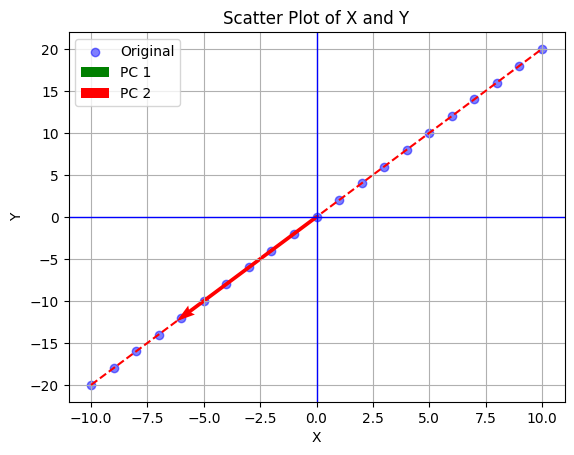

In [5]:
plot_scatter_and_line(X, y, eigenvectors, eigenvalues)

# Transform

Transform the original X, y to new axis created by the eigen vectors. There are two principle components.

- PC1 = Eigen Vector 1 (rotated x-axis)
- PC2 = Eigen vectore 2 (rotated y-axis)

__Note:__ that the naming choice rotated-y or x are arbitrary. It could be either x or y. Note that since data along one of the axis is `zero` that axis can be eliminated.

In [6]:
Xy_new = X_y @ eigenvectors

In [7]:
Xy_new

array([[ 6.66133815e-16,  2.23606798e+01],
       [-1.11022302e-16,  2.01246118e+01],
       [ 0.00000000e+00,  1.78885438e+01],
       [ 1.11022302e-16,  1.56524758e+01],
       [ 2.22044605e-16,  1.34164079e+01],
       [ 3.33066907e-16,  1.11803399e+01],
       [ 0.00000000e+00,  8.94427191e+00],
       [ 1.11022302e-16,  6.70820393e+00],
       [ 0.00000000e+00,  4.47213595e+00],
       [ 0.00000000e+00,  2.23606798e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.23606798e+00],
       [ 0.00000000e+00, -4.47213595e+00],
       [-1.11022302e-16, -6.70820393e+00],
       [ 0.00000000e+00, -8.94427191e+00],
       [-3.33066907e-16, -1.11803399e+01],
       [-2.22044605e-16, -1.34164079e+01],
       [-1.11022302e-16, -1.56524758e+01],
       [ 0.00000000e+00, -1.78885438e+01],
       [ 1.11022302e-16, -2.01246118e+01],
       [-6.66133815e-16, -2.23606798e+01]])

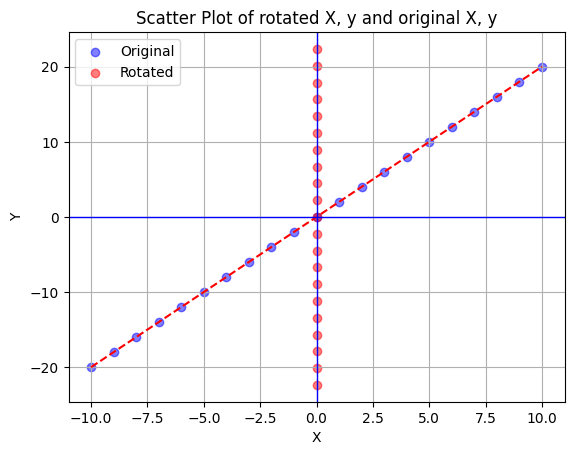

In [8]:
# Create a scatter plot of the transformed X, y
plt.scatter(X, y, alpha=0.5, color='blue', label='Original')
plt.scatter(Xy_new[:,0], Xy_new[:,1], alpha=0.5, color='red', label='Rotated')

plt.plot([-10, 10], [-20, 20], '--', color='red')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of rotated X, y and original X, y')
# Draw x and y axis in blue color
plt.axhline(0, color='blue',linewidth=1.0)
plt.axvline(0, color='blue',linewidth=1.0)
plt.legend()
plt.show()

# Reconstruction

Note that the rotated or transformed data can be rotated back by applying imverse rotation using Transpose of eigenvectors. In PCA, the eigenvectors matrix $V \in \mathbb{R}^{d \times d}$ is orthogonal:

$V^\top = V^{-1}$

That is:
$V^\top V = I$

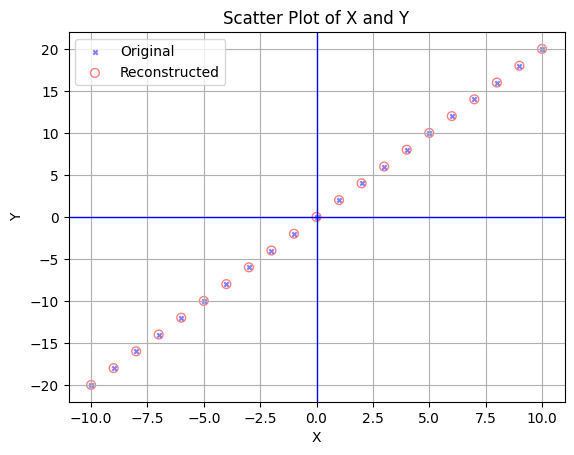

In [9]:
X_y_reconstructed = Xy_new @ eigenvectors.T
# Create a scatter plot of the transformed X, y
plt.scatter(X, y, alpha=0.5, color='blue', label='Original', s=10, marker='x')
plt.scatter(X_y_reconstructed[:,0], X_y_reconstructed[:,1],
            label='Reconstructed',
            facecolors='none', edgecolors='red',
            marker='o', s=40, alpha=0.5)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y')
# Draw x and y axis in blue color
plt.axhline(0, color='blue', linewidth=1.0)
plt.axvline(0, color='blue', linewidth=1.0)
plt.legend()
plt.show()

In [10]:
X_y_reconstructed

array([[-10., -20.],
       [ -9., -18.],
       [ -8., -16.],
       [ -7., -14.],
       [ -6., -12.],
       [ -5., -10.],
       [ -4.,  -8.],
       [ -3.,  -6.],
       [ -2.,  -4.],
       [ -1.,  -2.],
       [  0.,   0.],
       [  1.,   2.],
       [  2.,   4.],
       [  3.,   6.],
       [  4.,   8.],
       [  5.,  10.],
       [  6.,  12.],
       [  7.,  14.],
       [  8.,  16.],
       [  9.,  18.],
       [ 10.,  20.]])

# 3 Features, all correlated

This example has y and z that are correlated to x. The Two eignevalues will be almost equal to zero.

In [11]:
X = np.arange(-10, 11, 1)
y = 2 * X
z = 3 * X
Xyz = np.column_stack((X, y, z))  # Pair of x,y points

# Get covariance metric of both samples, cov expects row of datapoints
# for each feature, 2 features in this case and 2 rows
cov_xyz = np.cov(Xyz.T, ddof=1)
eigenvalues, eigenvectors = np.linalg.eig(cov_xyz)

In [12]:
eigenvalues, eigenvectors

(array([ 5.39000000e+02,  1.92236715e-14, -1.13874136e-14]),
 array([[-0.26726124, -0.72623583, -0.11696433],
        [-0.53452248,  0.65861473, -0.80790373],
        [-0.80178373, -0.19699787,  0.5775906 ]]))

In [13]:
Xyz_transformed = Xyz @ eigenvectors

In [14]:
Xyz

array([[-10, -20, -30],
       [ -9, -18, -27],
       [ -8, -16, -24],
       [ -7, -14, -21],
       [ -6, -12, -18],
       [ -5, -10, -15],
       [ -4,  -8, -12],
       [ -3,  -6,  -9],
       [ -2,  -4,  -6],
       [ -1,  -2,  -3],
       [  0,   0,   0],
       [  1,   2,   3],
       [  2,   4,   6],
       [  3,   6,   9],
       [  4,   8,  12],
       [  5,  10,  15],
       [  6,  12,  18],
       [  7,  14,  21],
       [  8,  16,  24],
       [  9,  18,  27],
       [ 10,  20,  30]])

In [15]:
Xyz_transformed

array([[ 3.74165739e+01,  4.55191440e-15, -1.99840144e-15],
       [ 3.36749165e+01,  5.16253706e-15, -1.44328993e-15],
       [ 2.99332591e+01,  3.99680289e-15, -8.88178420e-16],
       [ 2.61916017e+01,  2.83106871e-15, -2.10942375e-15],
       [ 2.24499443e+01,  2.99760217e-15, -1.55431223e-15],
       [ 1.87082869e+01,  2.27595720e-15, -9.99200722e-16],
       [ 1.49666295e+01,  1.99840144e-15, -4.44089210e-16],
       [ 1.12249722e+01,  1.49880108e-15, -7.77156117e-16],
       [ 7.48331477e+00,  9.99200722e-16, -2.22044605e-16],
       [ 3.74165739e+00,  4.99600361e-16, -1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.74165739e+00, -4.99600361e-16,  1.11022302e-16],
       [-7.48331477e+00, -9.99200722e-16,  2.22044605e-16],
       [-1.12249722e+01, -1.49880108e-15,  7.77156117e-16],
       [-1.49666295e+01, -1.99840144e-15,  4.44089210e-16],
       [-1.87082869e+01, -2.27595720e-15,  9.99200722e-16],
       [-2.24499443e+01, -2.99760217e-15

In [16]:
Xyz_reconstructed = Xyz_transformed @ eigenvectors.T

In [17]:
Xyz_reconstructed

array([[-10., -20., -30.],
       [ -9., -18., -27.],
       [ -8., -16., -24.],
       [ -7., -14., -21.],
       [ -6., -12., -18.],
       [ -5., -10., -15.],
       [ -4.,  -8., -12.],
       [ -3.,  -6.,  -9.],
       [ -2.,  -4.,  -6.],
       [ -1.,  -2.,  -3.],
       [  0.,   0.,   0.],
       [  1.,   2.,   3.],
       [  2.,   4.,   6.],
       [  3.,   6.,   9.],
       [  4.,   8.,  12.],
       [  5.,  10.,  15.],
       [  6.,  12.,  18.],
       [  7.,  14.,  21.],
       [  8.,  16.,  24.],
       [  9.,  18.,  27.],
       [ 10.,  20.,  30.]])

# 3 Features: 2 uncorrelated

This example has three features. Of which x and y are correlated. And z is independent of x/y. We will see that pnly one eigen-value is close to zero.

In [18]:
# Generate 20 random numbers between -10 and 10
X = np.random.uniform(-10, 10, size=20)
y = 2 * X
z = np.random.uniform(-30, 30, size=20)
Xyz = np.column_stack((X, y, z))  # Pair of x,y points

# Get covariance metric of both samples, cov expects row of datapoints
# for each feature, 2 features in this case and 2 rows
cov_xyz = np.cov(Xyz.T, ddof=1)
eigenvalues, eigenvectors = np.linalg.eig(cov_xyz)

In [19]:
eigenvalues, eigenvectors

(array([  0.        , 167.28834988, 348.847956  ]),
 array([[-8.94427191e-01,  4.38715643e-01,  8.67674154e-02],
        [ 4.47213595e-01,  8.77431286e-01,  1.73534831e-01],
        [ 9.91597728e-18, -1.94017839e-01,  9.80998001e-01]]))

In [20]:
Xyz_transformed = Xyz @ eigenvectors
Xyz_reconstructed = Xyz_transformed @ eigenvectors.T

In [21]:
Xyz

array([[  5.05843191,  10.11686381,   8.11370902],
       [  9.68311654,  19.36623308,  21.03664989],
       [ -6.58637077, -13.17274154,  15.04931484],
       [ -4.40385188,  -8.80770377,   4.6879979 ],
       [ -2.37955664,  -4.75911327, -28.34557092],
       [  9.89699659,  19.79399318,  29.13167305],
       [  1.27793692,   2.55587384, -28.32695553],
       [ -9.72565079, -19.45130158,  23.94020674],
       [ -0.94314859,  -1.88629719,  -0.53232734],
       [ -3.04850373,  -6.09700746, -18.52456253],
       [  2.07551683,   4.15103366,   8.0568433 ],
       [  0.29764729,   0.59529458, -12.45553159],
       [ -0.47108619,  -0.94217238,  22.8822479 ],
       [  0.74561919,   1.49123838,  19.4583119 ],
       [ -9.87665647, -19.75331293,   4.22541644],
       [  3.68706658,   7.37413317,  -5.62832319],
       [  5.47730661,  10.95461322,  -9.88245665],
       [ -5.66225803, -11.32451605, -26.54851412],
       [  8.84433353,  17.68866707,   6.38802355],
       [ -3.59577592,  -7.19155

In [22]:
Xyz_transformed

array([[-2.62689031e-15,  9.52186174e+00,  1.01540676e+01],
       [-5.40162548e-15,  1.71591882e+01,  2.48378065e+01],
       [ 3.99263411e-15, -1.73675550e+01,  1.19059359e+01],
       [ 2.41371172e-15, -1.05697488e+01,  2.68836234e+00],
       [ 9.95096672e-16,  2.79802818e-01, -2.88392883e+01],
       [-4.39914100e-15,  1.60577719e+01,  3.28717971e+01],
       [-9.32586263e-16,  8.29918929e+00, -2.72342703e+01],
       [ 5.84291993e-15, -2.59788029e+01,  1.92659470e+01],
       [ 5.44677244e-16, -1.96558921e+00, -9.31384882e-01],
       [ 1.69534679e-15, -3.09303578e+00, -1.94951128e+01],
       [-9.68827799e-16,  2.98963718e+00,  8.80418333e+00],
       [-3.12635952e-16,  3.06950793e+00, -1.20897212e+01],
       [ 5.13203468e-16, -5.47292870e+00,  2.22430648e+01],
       [-2.57771623e-16, -2.13968562e+00,  1.94120423e+01],
       [ 6.09163769e-15, -2.24850246e+01, -1.39734698e-01],
       [-2.10291287e-15,  9.17986404e+00, -3.92178761e+00],
       [-3.29758272e-15,  1.39322733e+01

In [23]:
Xyz_reconstructed

array([[  5.05843191,  10.11686381,   8.11370902],
       [  9.68311654,  19.36623308,  21.03664989],
       [ -6.58637077, -13.17274154,  15.04931484],
       [ -4.40385188,  -8.80770377,   4.6879979 ],
       [ -2.37955664,  -4.75911327, -28.34557092],
       [  9.89699659,  19.79399318,  29.13167305],
       [  1.27793692,   2.55587384, -28.32695553],
       [ -9.72565079, -19.45130158,  23.94020674],
       [ -0.94314859,  -1.88629719,  -0.53232734],
       [ -3.04850373,  -6.09700746, -18.52456253],
       [  2.07551683,   4.15103366,   8.0568433 ],
       [  0.29764729,   0.59529458, -12.45553159],
       [ -0.47108619,  -0.94217238,  22.8822479 ],
       [  0.74561919,   1.49123838,  19.4583119 ],
       [ -9.87665647, -19.75331293,   4.22541644],
       [  3.68706658,   7.37413317,  -5.62832319],
       [  5.47730661,  10.95461322,  -9.88245665],
       [ -5.66225803, -11.32451605, -26.54851412],
       [  8.84433353,  17.68866707,   6.38802355],
       [ -3.59577592,  -7.19155